In [1]:
# Importing Dataset
dir =  '../Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/R/Social_Network_Ads.csv'
dataset = read.csv(dir)

In [2]:
dataset = dataset[3:5]

In [3]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))
#dataset$Gender = factor(dataset$Gender,
#                        levels = c('Male', 'Female'),
#                        labels = c( 1, 2))

In [4]:
library('caTools')
set.seed(123)

In [5]:
split = sample.split(dataset$Purchased, SplitRatio=0.75 )
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split==FALSE)

In [6]:
#Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [7]:
nrow(dataset)
nrow(training_set)
nrow(test_set)

[1] 400

[1] 300

[1] 100

In [8]:
library(class)

In [9]:
training_set

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.47334137,0
3,-1.0962966,-0.78837605,0
6,-1.0006894,-0.36027273,0
7,-1.0006894,0.38177303,0
8,-0.5226531,2.26542765,1
10,-0.2358313,-0.16049118,0
11,-1.0962966,0.26761214,0
13,-1.6699402,0.43885347,0
14,-0.5226531,-1.50188159,0
15,-1.8611548,0.32469259,0


In [10]:
nrow(training_set[3])

[1] 300

In [11]:
y_pred = knn(train = training_set[,-3],
              test = test_set[,-3],
              cl = training_set[,3],
              k = 5)

In [12]:
table(test_set$Purchased)


 0  1 
64 36 

In [13]:
table(y_pred)

y_pred
 0  1 
65 35 

In [14]:
mean(y_pred == test_set$Purchased)

[1] 0.89

In [15]:
summary(classifier)

ERROR: Error in summary(classifier): object 'classifier' not found


In [16]:
cm = table(test_set[, 3], y_pred)

In [19]:
library(ElemStatLearn)

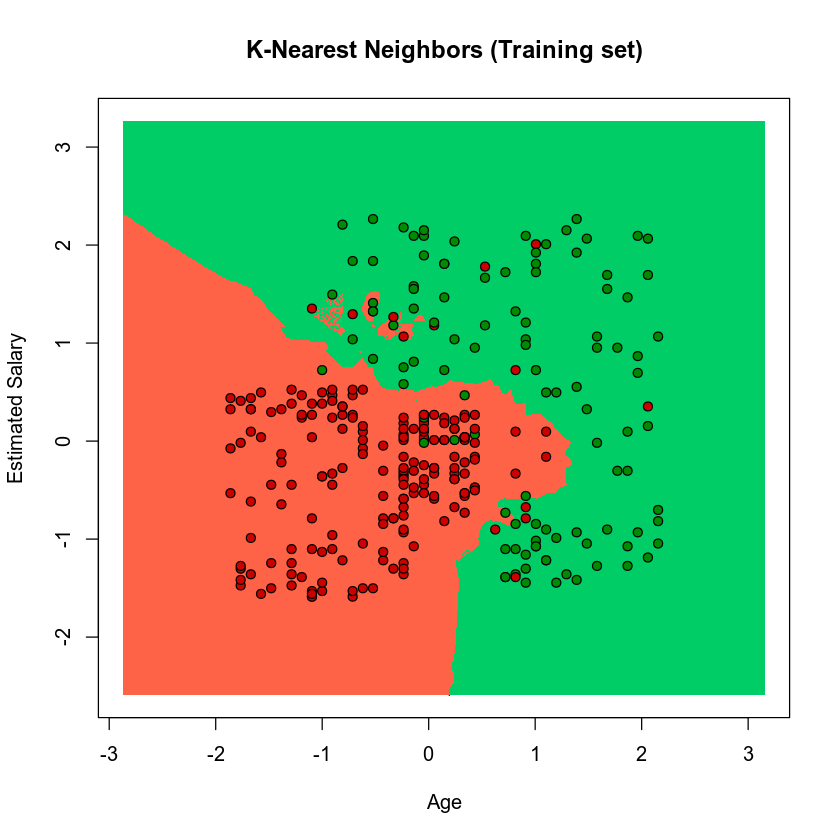

In [20]:
set = training_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[,-3],
     main = 'K-Nearest Neighbors (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

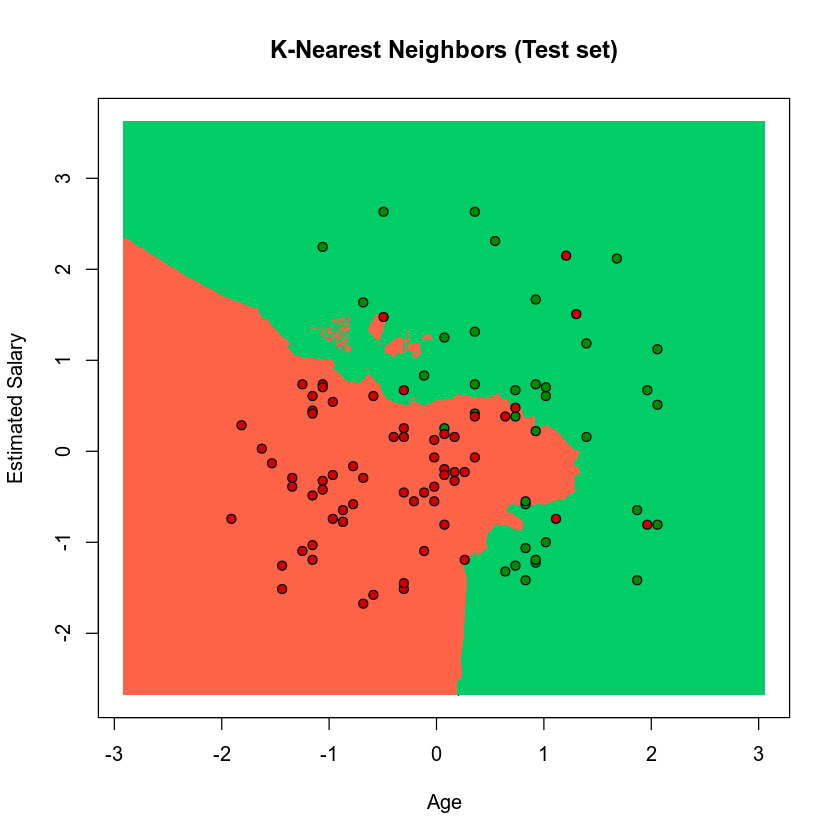

In [21]:
set = test_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[,-3],
     main = 'K-Nearest Neighbors (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))